# 18.FORECASTING_COCOCOLA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
cocacola= pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
cocacola1=cocacola.copy()

In [ ]:
cocacola1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
cocacola1.dtypes

Quarter     object
Sales      float64
dtype: object

In [ ]:
cocacola1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


**convert Quarters into datetime**

In [ ]:
cocacola1['Quarter_Year'] = cocacola1['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
cocacola1['date'] = (pd.to_datetime(cocacola1['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))


In [ ]:
cocacola1

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [ ]:
cocacola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   date          42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [ ]:
cocacola1.drop(columns=['Quarter','Quarter_Year'],inplace=True)

In [ ]:
cocacola1.head(5)

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [ ]:
Data = cocacola1[['date','Sales']]

In [ ]:
Data.head(3)

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993


In [ ]:
Data.set_index('date',inplace=True)
Data.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


**Visualization**

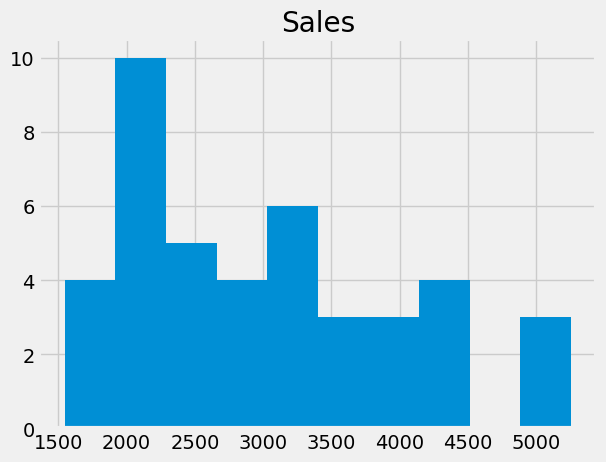

In [ ]:
Data.hist()
plt.show()

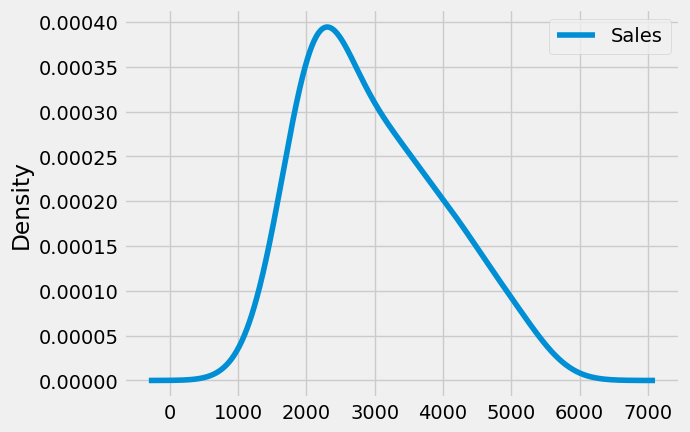

In [ ]:
Data.plot(kind='kde')
plt.show()

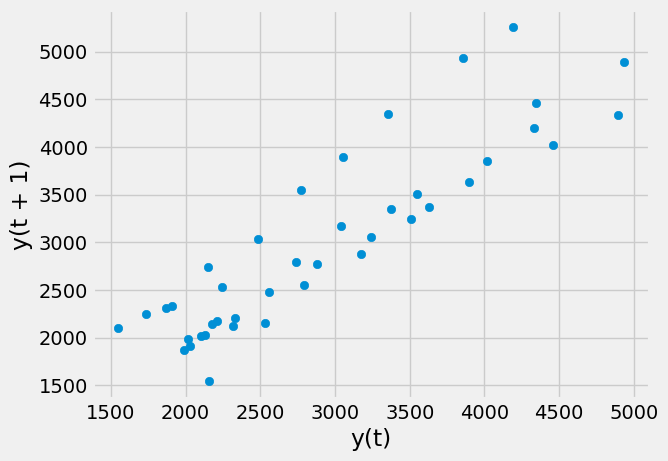

In [ ]:
lag_plot(Data)
plt.show()

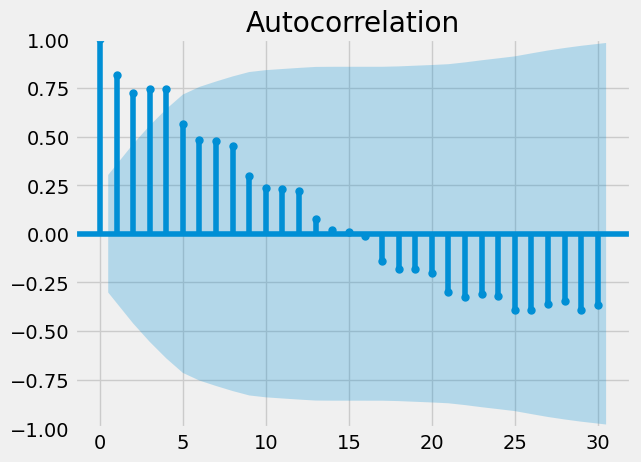

In [ ]:
plot_acf(Data,lags=30)
plt.show()

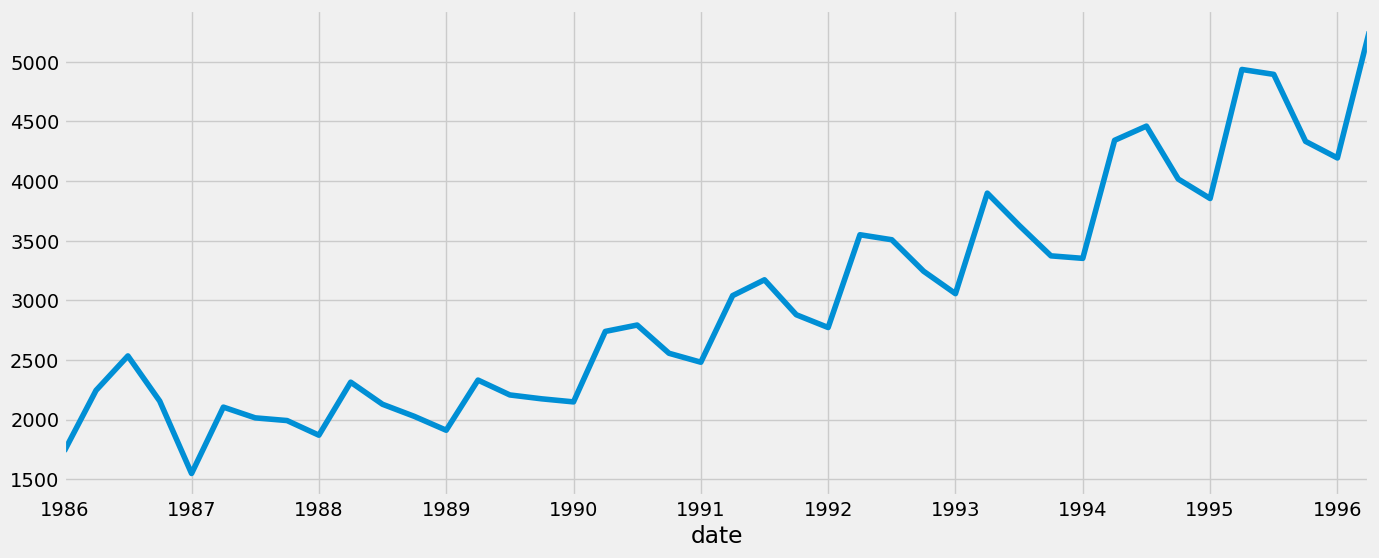

In [ ]:
Data['Sales'].plot(figsize=(15, 6))
plt.show()


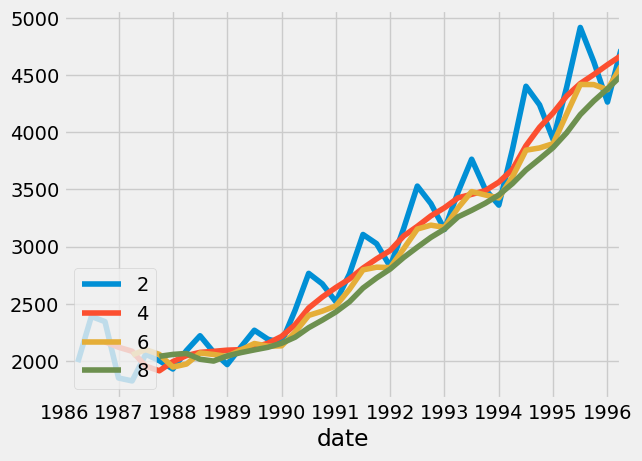

In [ ]:
for i in range(2,10,2):
    Data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

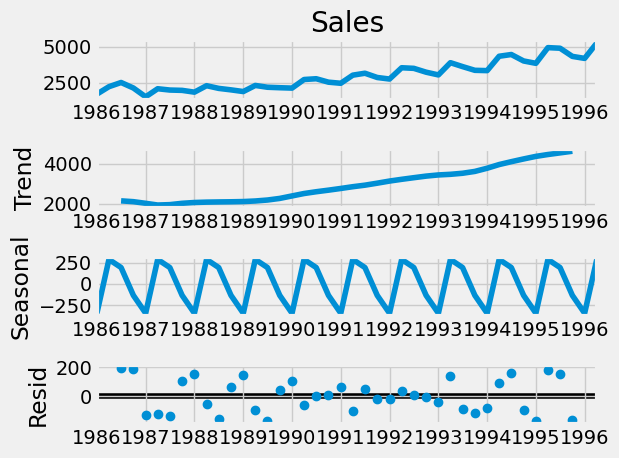

In [ ]:
ts_add = seasonal_decompose(Data.Sales,model="additive")
fig = ts_add.plot()
plt.show()

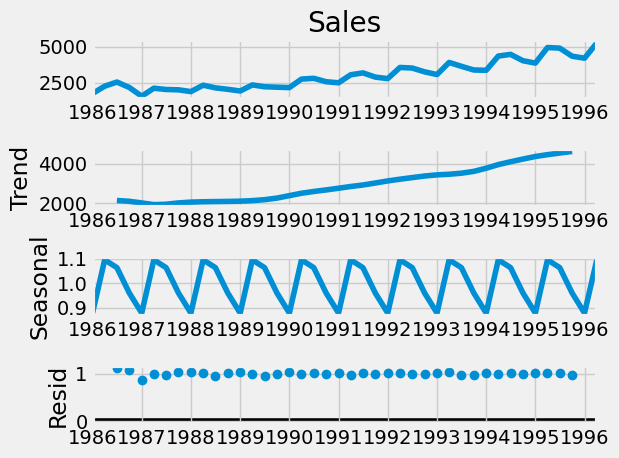

In [ ]:
ts_mul = seasonal_decompose(Data.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

In [ ]:
X= Data['Sales'].values

In [ ]:
size = int(len(X) * 0.66)

In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Wed, 07 Jun 2023   AIC                            360.163
Time:                        18:47:35   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

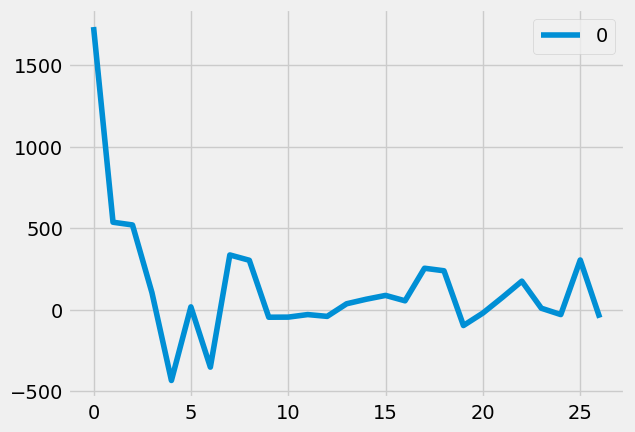

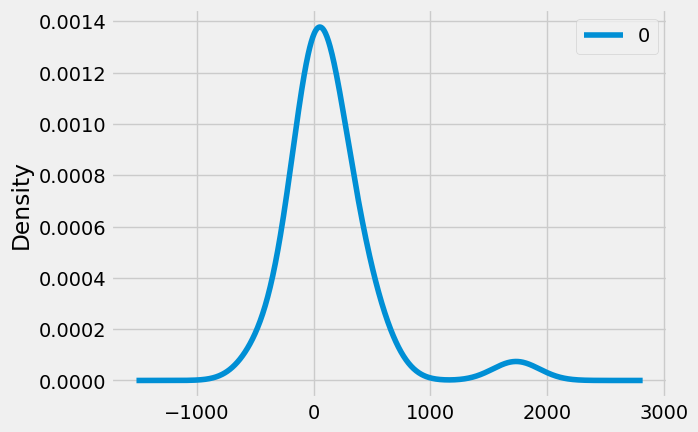

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659591
25%     -34.938856
50%      55.067398
75%     247.080157
max    1734.827000


In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
history = [x for x in train]

In [ ]:
predictions = list()

In [ ]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132560, expected=3243.859993
predicted=3167.315971, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837500, expected=3629.000000
predicted=3332.744953, expected=3373.000000
predicted=3258.575374, expected=3352.000000
predicted=4081.006044, expected=4342.000000
predicted=3955.784129, expected=4461.000000
predicted=4146.277764, expected=4017.000000
predicted=3958.436605, expected=3854.000000
predicted=4701.652928, expected=4936.000000
predicted=4990.071243, expected=4895.000000
predicted=4390.352764, expected=4333.000000
predicted=4190.945470, expected=4194.000000
predicted=5177.006981, expected=5253.000000


In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34279.908


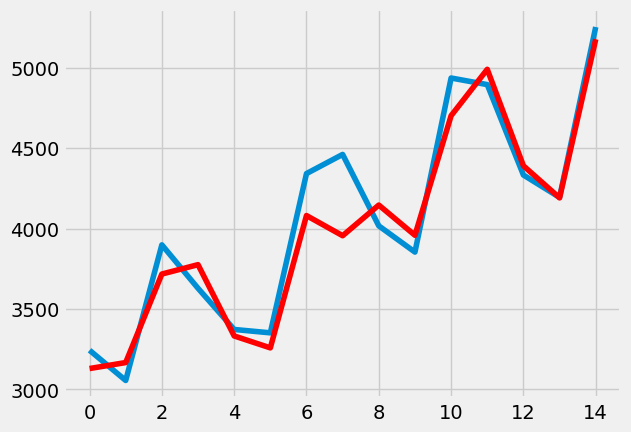

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Comparing Multiple Models**

In [ ]:
data2 = pd.get_dummies(cocacola, columns = ['Quarter'])

In [ ]:
data2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']



In [ ]:
data2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
t= np.arange(1,43)
data2['t'] = t

In [ ]:
data2['t_sq'] = data2['t']*data2['t']
log_Sales=np.log(data2['Sales'])

In [ ]:
data2['log_Sales']=log_Sales

In [ ]:
data2.head(3)

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477


In [ ]:
train1, test1= np.split(data2, [int(.67 *len(data2))]) 

In [ ]:
#Linear Model
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmse_lin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmse_lin

580.1224130918635

In [ ]:
#Exponential Model
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmse_expo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmse_expo

588.1405104900199

In [ ]:
#Quadratic Model
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmse_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmse_quad

783.7297975037553

In [ ]:
#Additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmse_add

1869.7188209186954

In [ ]:
#Additive Seasonality Quadratic
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmse_add_quad

412.1144436053725

In [ ]:
#Multiplicative Seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmse_mul

2374.9194407954424

In [ ]:
#Multiplicative Additive Seasonality
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_lin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmse_mul_lin

5359.6879119332325

In [ ]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.56194673477

In [ ]:
#Comparing the results
final = {"MODEL":pd.Series(["rmse_lin","rmse_expo","rmse_quad","rmse_add","rmse_add_quad","rmse_mul","rmse_mul_lin","rmse_mul_quad"]),"RMSE_Values":pd.Series([rmse_lin,rmse_expo,rmse_quad,rmse_add,rmse_add_quad,rmse_mul,rmse_mul_lin,rmse_mul_quad])}
table_rmse=pd.DataFrame(final)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_quad,412.114444
0,rmse_lin,580.122413
1,rmse_expo,588.140510
2,rmse_quad,783.729798
3,rmse_add,1869.718821
5,rmse_mul,2374.919441
7,rmse_mul_quad,3630.561947
6,rmse_mul_lin,5359.687912


# CONCLUSION

**Additive seasonality with quadratic trend has the best RMSE value so it is a better model**